# Pandas challenges

Read the `veahicles.csv` dataframe and store it in a variable called `cars`:

In [13]:
import pandas as pd
import re

In [14]:
cars = pd.read_csv('data/vehicles.csv')

Explore the dataset:

- How many rows and columns are there?

- What are the data types of the columns?

- Are there missing values?

- What are the ranges / distributions of the numerical columns?

- What are the value counts for the categorical columns?

In [15]:
cars.info()
cars.head()
cars.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

(35952, 15)

In [16]:
cars.isna().sum(axis=0)

Make                       0
Model                      0
Year                       0
Engine Displacement        0
Cylinders                  0
Transmission               0
Drivetrain                 0
Vehicle Class              0
Fuel Type                  0
Fuel Barrels/Year          0
City MPG                   0
Highway MPG                0
Combined MPG               0
CO2 Emission Grams/Mile    0
Fuel Cost/Year             0
dtype: int64

In [17]:
cars.describe()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
count,35952.00000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000
mean,2000.71640,3.338493,5.765076,17.609056,17.646139,23.880646,19.929322,475.316339,1892.598465
std,10.08529,1.359395,1.755268,4.467283,4.769349,5.890876,5.112409,119.060773,506.958627
min,1984.00000,0.600000,2.000000,0.060000,6.000000,9.000000,7.000000,37.000000,600.000000
25%,1991.00000,2.200000,4.000000,14.699423,15.000000,20.000000,16.000000,395.000000,1500.000000
50%,2001.00000,3.000000,6.000000,17.347895,17.000000,24.000000,19.000000,467.736842,1850.000000
75%,2010.00000,4.300000,6.000000,20.600625,20.000000,27.000000,23.000000,555.437500,2200.000000
max,2017.00000,8.400000,16.000000,47.087143,58.000000,61.000000,56.000000,1269.571429,5800.000000


array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Engine Displacement'}>,
        <AxesSubplot:title={'center':'Cylinders'}>],
       [<AxesSubplot:title={'center':'Fuel Barrels/Year'}>,
        <AxesSubplot:title={'center':'City MPG'}>,
        <AxesSubplot:title={'center':'Highway MPG'}>],
       [<AxesSubplot:title={'center':'Combined MPG'}>,
        <AxesSubplot:title={'center':'CO2 Emission Grams/Mile'}>,
        <AxesSubplot:title={'center':'Fuel Cost/Year'}>]], dtype=object)

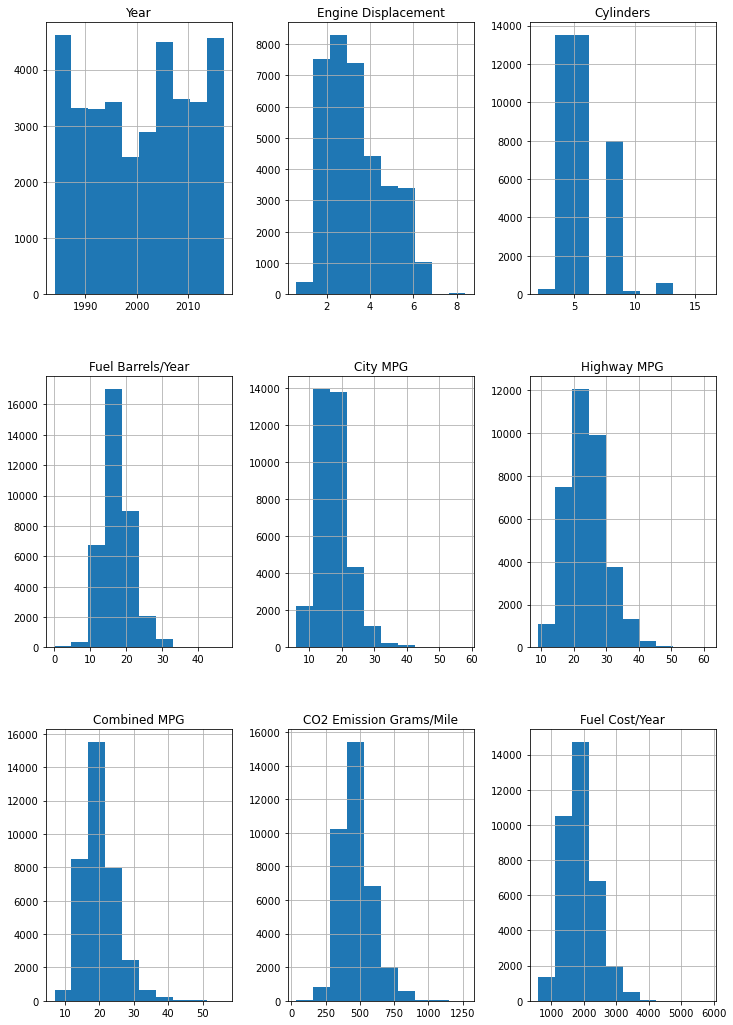

In [18]:
cars.hist(figsize=(12,18))

Drop the column "Combined MPG"

In [20]:
cars.drop(['Combined MPG'],axis=1,inplace=True)

Change column names so that there are no names with spaces or weird special characters:

In [22]:
cars.columns = cars.columns.str.replace(' ','_')
cars.columns = cars.columns.str.replace('/','_')
# cars.columns = cars.columns.str.replace('\W','_')

cars.rename(columns={"Unnamed:_0": "id"},inplace=True)

What brand has the most cars?

In [394]:
# temp = cars.groupby('Make').id.count().reset_index()
# max_brand_cars = temp[temp.id == temp.id.max()]
# print(max_brand_cars)
print(cars.Make.value_counts().head(1))

Chevrolet    3643
Name: Make, dtype: int64


What brand has the worse CO2 Emissions on average?

In [23]:
cars.groupby('Make').agg({'CO2_Emission_Grams_Mile': 'mean'}).sort_values(by='CO2_Emission_Grams_Mile',ascending=False).head(1)

,CO2_Emission_Grams_Mile
Make,
Vector,1049.159722


Which brands are more environment friendly?

In [24]:
cars.groupby('Make').agg({'CO2_Emission_Grams_Mile': 'mean'}).sort_values(by='CO2_Emission_Grams_Mile').head(10)

,CO2_Emission_Grams_Mile
Make,
Fisker,169.000000
smart,247.030556
Fiat,304.666560
Daihatsu,310.188060
MINI,313.716862
Scion,331.395918
Geo,337.077591
Yugo,356.068256
Grumman Olson,356.337423


Create 4 groups (bins) of cars, by Year. We want to explore how cars have evolved decade by decade.

In [25]:
cars['decades'] = pd.cut(cars['Year'],[1979,1989,1999,2009,2019],labels=['80s','90s','00s','10s'])

Did cars consume more gas in the eighties?

In [26]:
print (cars.groupby('decades').Fuel_Barrels_Year.mean())

decades
80s    18.552822
90s    18.293291
00s    17.962477
10s    15.778968
Name: Fuel_Barrels_Year, dtype: float64


Do cars with automatic transmission consume more fuel than cars with manual transmission?

In [399]:
import re

In [27]:
# print( cars.Transmission.unique()) #to check different transmissions
cars['Clean_transmission'] = cars.apply(lambda row : 'Automatic' if row.Transmission.lower().startswith('auto') else 'Manual',axis=1)
# print(cars.head(5))
cars.groupby('Clean_transmission').Fuel_Barrels_Year.mean()

Clean_transmission
Automatic    18.043152
Manual       16.704904
Name: Fuel_Barrels_Year, dtype: float64

Group cars by fuel type and aggregate them by the following criteria: 

- The maximum number cylinders
- The oldest year
- The average Miles Per Gallon in the city

In [401]:
cars.groupby('Fuel_Type').agg({'Cylinders' : 'max', 'Year' : 'min', 'City_MPG' : 'mean'})

,Cylinders,Year,City_MPG
Fuel_Type,,,
CNG,8.0,1993,15.966667
Diesel,10.0,1984,21.173436
Gasoline or E85,8.0,2000,15.347280
Gasoline or natural gas,8.0,2000,13.700000
Gasoline or propane,8.0,2001,12.000000
Midgrade,8.0,2011,14.851351
Premium,16.0,1985,16.793166
Premium Gas or Electricity,8.0,2011,30.705882
Premium and Electricity,8.0,2014,24.900000


We want to use "Drivetrain" in a statistical model. Convert the column to numeric.

In [402]:

#cars['Drivetrain'] = cars.Drivetrain.apply(lambda x : '4' if x.to_series().contains('2|rear|front') else '2')

cars.loc[cars.Drivetrain.str.contains('2|Rear|Front'), 'Drivetrain'] = 2
cars.loc[cars.Drivetrain != 2, 'Drivetrain'] = 4

print (cars.Drivetrain.unique())



[2 4]


In [403]:
cars['Drivetrain'] = pd.to_numeric(cars.Drivetrain)

In [404]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       35952 non-null  int64   
 1   Make                     35952 non-null  object  
 2   Model                    35952 non-null  object  
 3   Year                     35952 non-null  int64   
 4   Engine_Displacement      35952 non-null  float64 
 5   Cylinders                35952 non-null  float64 
 6   Transmission             35952 non-null  object  
 7   Drivetrain               35952 non-null  int64   
 8   Vehicle_Class            35952 non-null  object  
 9   Fuel_Type                35952 non-null  object  
 10  Fuel_Barrels_Year        35952 non-null  float64 
 11  City_MPG                 35952 non-null  int64   
 12  Highway_MPG              35952 non-null  int64   
 13  CO2_Emission_Grams_Mile  35952 non-null  float64 
 14  Fuel_C

Read the `car_brands.csv` data:

In [201]:
car_brands = pd.read_csv('data/car_brands.csv')
print(car_brands.head(5))

                         brand  revenue  production
0                   AM General     1537    1.002916
1             ASC Incorporated      232    1.628105
2                        Acura      234    3.394481
3                   Alfa Romeo     1174    2.313726
4  American Motors Corporation     1230    1.231024


Join the cars dataframe with the car brands dataframe.

In [105]:
cars.merge(car_brands, left_on='Make', right_on='brand')

,id,Make,Model,Year,Engine_Displacement,Cylinders,Transmission,Drivetrain,Vehicle_Class,Fuel_Type,...,City_MPG,Highway_MPG,CO2_Emission_Grams_Mile,Fuel_Cost_Year,count,decades,Clean_transmission,brand,revenue,production
0,0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,...,18,17,522.764706,1950,NaN,"(1979, 1989]",Automatic,AM General,1537,1.002916
1,1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,...,13,13,683.615385,2550,NaN,"(1979, 1989]",Automatic,AM General,1537,1.002916
2,2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,...,16,17,555.437500,2100,NaN,"(1979, 1989]",Automatic,AM General,1537,1.002916
3,3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,...,13,13,683.615385,2550,NaN,"(1979, 1989]",Automatic,AM General,1537,1.002916
4,4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,...,14,21,555.437500,2550,NaN,"(1979, 1989]",Automatic,ASC Incorporated,232,1.628105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,...,34,38,244.000000,1100,NaN,"(2009, 2019]",Automatic,smart,447,2.229253
35948,35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,...,34,38,243.000000,1100,NaN,"(2009, 2019]",Automatic,smart,447,2.229253
35949,35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,...,34,38,244.000000,1100,NaN,"(2009, 2019]",Automatic,smart,447,2.229253
35950,35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,...,34,39,246.000000,1100,NaN,"(2009, 2019]",Automatic,smart,447,2.229253


Which brands have the most revenue?

In [109]:
car_brands.loc[car_brands['revenue'].idxmax()]

brand             Geo
revenue          1988
production    1.10077
Name: 41, dtype: object